In [622]:
import numpy as np
import math
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Задача 1

In [623]:
def get_const(a, b, u_0):
    return math.log(u_0/(a-b*u_0))/a

def model(a, b, u_0, dt, K):
    if a == 0:
        print(f"{a=}, {b=}, {u_0}")
        print('Некорректно заданы параметры(a == 0)')
        return
    
    if a-b*u_0 == 0:
        print('Некорректно заданы параметры(a-b*u_0 == 0)')
        print(f"{a=}, {b=}, {u_0}")
        return
    
    if u_0/(a-b*u_0) <= 0:
        print('Некорректно заданы параметры(u_0/(a-b*u_0) <= 0)')
        print(f"{a=}, {b=}, {u_0}")
        return
    
    u_values = [u_0]
    C = get_const(a, b, u_0)
    t = 0
    for k in range(1, K):
        t += dt
        e = math.exp(a*(t+C))
        u_next = a*e / (1 + b*e)
        u_values.append(u_next)
    return u_values

In [624]:
def Q(a, b, u_0, dt, u_data):
    """Вычисляет ошибку как сумму квадратов отклонений."""
    K = len(u_data)
    u_model = model(a, b, u_0, dt, K)
    return np.sum((u_model - u_data) ** 2)

def z_a(a, b, u_data, dt):
    z_a_values =[]
    t_k = 0
    for u_k in u_data:
        z_a_value = u_k * (math.exp((a-2*b*u_k)*t_k) - 1) / (a-2*b*u_k)
        z_a_values.append(z_a_value)
        t_k += dt
    return np.array(z_a_values)

def z_b(a, b, u_data, dt):
    z_b_values =[]
    t_k = 0
    for u_k in u_data:
        z_b_value = -1 * u_k *u_k * (math.exp((a-2*b*u_k)*t_k) - 1) / (a-2*b*u_k)
        z_b_values.append(z_b_value)
        t_k += dt
    return np.array(z_b_values)

def gradient_descent(u_data, u_0, a_init, b_init, dt, lr=0.1, max_iter=100000):
    """
    Реализация градиентного спуска для оптимизации параметров a и b.
    """
    a, b = a_init, b_init
    history = []
    K = len(u_data)

    for iteration in range(max_iter):
        # print(f"{iteration=}: {a=}, {b=}, {u_0=}, {K=}")
        # Вычисление модели и ошибки
        u_model = model(a, b, u_0, dt, K)
        error = np.sum((u_model - u_data) ** 2)
        history.append(error)

        z_a_values = z_a(a, b, u_data, dt)
        z_b_values = z_b(a, b, u_data, dt)

        # print(f"{z_a_values=}, {z_b_values=}")
        
        # Численное вычисление градиентов
        grad_a = 2 * np.sum((u_model - u_data) * z_a_values)
        grad_b = 2 * np.sum((u_model - u_data) * z_b_values)

        # print(f"{grad_a=}, {grad_b=}")
        
        # Обновление параметров
        a -= lr * grad_a
        b -= lr * grad_b
        
        # Вывод промежуточного результата
        if iteration % 1000 == 0:
            print(f"Итерация {iteration}, ошибка: {error:.4f}, a: {a:.4f}, b: {b:.4f}")
            print(f"{grad_a=}, {grad_b=}")
        
        # Условие остановки
        if len(history) > 1 and history[-2]-history[-1] < 1e-16 :
            break
    
    return a, b, history


In [725]:
dt = 0.01
u_0 = 1.0
a_true = 5
b_true = 2
K = 20

u_values = model(a_true, b_true, u_0, dt, K)

if u_values:
    for k, u in enumerate(u_values):
        print(f"u[{k}] = {u:.5f}")

u[0] = 1.00000
u[1] = 1.03014
u[2] = 1.06056
u[3] = 1.09120
u[4] = 1.12203
u[5] = 1.15303
u[6] = 1.18415
u[7] = 1.21534
u[8] = 1.24658
u[9] = 1.27783
u[10] = 1.30904
u[11] = 1.34018
u[12] = 1.37120
u[13] = 1.40208
u[14] = 1.43276
u[15] = 1.46323
u[16] = 1.49343
u[17] = 1.52335
u[18] = 1.55294
u[19] = 1.58217


Итерация 0, ошибка: 0.0192, a: 10.0007, b: 5.9975
grad_a=np.float64(-0.007339297707111392), grad_b=np.float64(0.025069465170309828)
Итерация 1000, ошибка: 0.0148, a: 9.3826, b: 5.4835
grad_a=np.float64(0.006027137714634766), grad_b=np.float64(0.004755506633740868)
Итерация 2000, ошибка: 0.0115, a: 8.8077, b: 5.0295
grad_a=np.float64(0.005471743001904032), grad_b=np.float64(0.004324420657919666)
Итерация 3000, ошибка: 0.0087, a: 8.2882, b: 4.6186
grad_a=np.float64(0.004919672997077601), grad_b=np.float64(0.003894323892572056)
Итерация 4000, ошибка: 0.0065, a: 7.8233, b: 4.2503
grad_a=np.float64(0.0043815387149075714), grad_b=np.float64(0.0034736237694468867)
Итерация 5000, ошибка: 0.0048, a: 7.4112, b: 3.9233
grad_a=np.float64(0.0038668030366438236), grad_b=np.float64(0.003069917118521698)
Итерация 6000, ошибка: 0.0035, a: 7.0490, b: 3.6356
grad_a=np.float64(0.003383205493261267), grad_b=np.float64(0.002689511215280452)
Итерация 7000, ошибка: 0.0026, a: 6.7333, b: 3.3845
grad_a=np.float

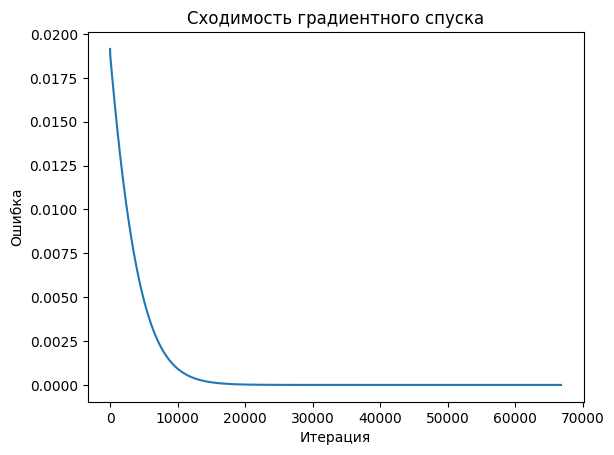

In [626]:
# Заданные данные
u_data = np.array(u_values)

# Начальные параметры
u_0 = u_data[0]
a_init, b_init = 10, 6

# Оптимизация
a_opt, b_opt, history = gradient_descent(u_data, u_0, a_init, b_init, dt)

# Вывод результатов
print(f"Оптимальные параметры: a = {a_opt:.4f}, b = {b_opt:.4f}")

# Визуализация ошибки
plt.plot(history)
plt.xlabel("Итерация")
plt.ylabel("Ошибка")
plt.title("Сходимость градиентного спуска")
plt.show()

In [627]:
# Добавление шума в данные
noise = np.random.normal(0, 0.01, K)  # Среднее значение 0, стандартное отклонение 0.01
u_values_with_noise = np.array(u_values) + noise
for k, u in enumerate(u_values):
        print(f"u[{k}] = {u:.5f}, u_noise[{k}] = {u_values_with_noise[k]}")

u[0] = 1.00000, u_noise[0] = 1.0038098720188044
u[1] = 1.03014, u_noise[1] = 1.0443385899266622
u[2] = 1.06056, u_noise[2] = 1.0725151740016623
u[3] = 1.09120, u_noise[3] = 1.0853802313183558
u[4] = 1.12203, u_noise[4] = 1.115270542252782
u[5] = 1.15303, u_noise[5] = 1.159244819970081
u[6] = 1.18415, u_noise[6] = 1.1890882783607712
u[7] = 1.21534, u_noise[7] = 1.220709148559213
u[8] = 1.24658, u_noise[8] = 1.2531585110084908
u[9] = 1.27783, u_noise[9] = 1.2870219471502315
u[10] = 1.30904, u_noise[10] = 1.293070458494522
u[11] = 1.34018, u_noise[11] = 1.354944802776292
u[12] = 1.37120, u_noise[12] = 1.38212977494124
u[13] = 1.40208, u_noise[13] = 1.4051895664275784
u[14] = 1.43276, u_noise[14] = 1.4431826046272
u[15] = 1.46323, u_noise[15] = 1.4710501675104186
u[16] = 1.49343, u_noise[16] = 1.4856462538067854
u[17] = 1.52335, u_noise[17] = 1.5323869847519918
u[18] = 1.55294, u_noise[18] = 1.5455955759916051
u[19] = 1.58217, u_noise[19] = 1.5628925940046878


Итерация 0, ошибка: 0.0171, a: 10.0005, b: 5.9979
grad_a=np.float64(-0.00528657949986709), grad_b=np.float64(0.02061465793887356)
Итерация 1000, ошибка: 0.0136, a: 9.4460, b: 5.5405
grad_a=np.float64(0.005394794534189024), grad_b=np.float64(0.004245548724184426)
Итерация 2000, ошибка: 0.0109, a: 8.9312, b: 5.1351
grad_a=np.float64(0.004901095569184059), grad_b=np.float64(0.0038626764562891113)
Итерация 3000, ошибка: 0.0087, a: 8.4655, b: 4.7678
grad_a=np.float64(0.004416333867164883), grad_b=np.float64(0.003485540105367396)
Итерация 4000, ошибка: 0.0069, a: 8.0475, b: 4.4376
grad_a=np.float64(0.003948100688771362), grad_b=np.float64(0.003120172418450815)
Итерация 5000, ошибка: 0.0056, a: 7.6752, b: 4.1432
grad_a=np.float64(0.0035028906899578164), grad_b=np.float64(0.002771801997438872)
Итерация 6000, ошибка: 0.0045, a: 7.3460, b: 3.8826
grad_a=np.float64(0.003085816753516944), grad_b=np.float64(0.002444610567545682)
Итерация 7000, ошибка: 0.0037, a: 7.0570, b: 3.6535
grad_a=np.float64(

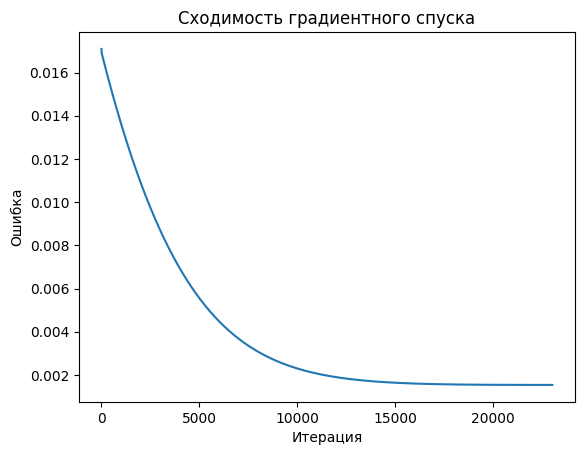

In [628]:
# Заданные данные
u_data = np.array(u_values_with_noise)

# Начальные параметры
u_0 = u_data[0]
a_init, b_init = 10, 6

# Оптимизация
a_opt, b_opt, history = gradient_descent(u_data, u_0, a_init, b_init, dt)

# Вывод результатов
print(f"Оптимальные параметры: a = {a_opt:.4f}, b = {b_opt:.4f}")

# Визуализация ошибки
plt.plot(history)
plt.xlabel("Итерация")
plt.ylabel("Ошибка")
plt.title("Сходимость градиентного спуска")
plt.show()

### Решение с помошью решателя

In [629]:
a = 5.0  
b = 2.0 
u0 = 1.0 

# Функция правой части дифференциального уравнения
def du_dt(t, u):
    return a * u - b * u**2


# Интервал времени для интегрирования
t_span = (0, dt*K)
t_eval = np.linspace(*t_span, K)  # Точки времени для вывода результата

# Решение системы
solution = solve_ivp(du_dt, t_span, [u0], t_eval=t_eval)


print(solution.y[0])
for k, u in enumerate(u_values):
    print(f"u[{k}] = {u:.5f}, {solution.y[0][k]}")

[1.         1.03173892 1.06377079 1.09605441 1.12854766 1.16120749
 1.19398991 1.22685001 1.25974218 1.29262195 1.32544276 1.35815858
 1.39072466 1.42309759 1.45523527 1.48709689 1.51864295 1.54983528
 1.58063701 1.61101257]
u[0] = 1.00000, 1.0
u[1] = 1.03014, 1.031738919726464
u[2] = 1.06056, 1.0637707870081794
u[3] = 1.09120, 1.0960544084487551
u[4] = 1.12203, 1.128547660444946
u[5] = 1.15303, 1.1612074891866535
u[6] = 1.18415, 1.1939899106569265
u[7] = 1.21534, 1.226850010631959
u[8] = 1.24658, 1.259742181047903
u[9] = 1.27783, 1.2926219532654444
u[10] = 1.30904, 1.3254427645907558
u[11] = 1.34018, 1.3581585763997182
u[12] = 1.37120, 1.3907246595022444
u[13] = 1.40208, 1.4230975941422794
u[14] = 1.43276, 1.4552352699977988
u[15] = 1.46323, 1.4870968861808112
u[16] = 1.49343, 1.518642951237356
u[17] = 1.52335, 1.5498352831475044
u[18] = 1.55294, 1.58063700932536
u[19] = 1.58217, 1.6110125666190571


In [630]:
# Зашумляем
noise = np.random.normal(0, 0.01, K)  # Среднее значение 0, стандартное отклонение 0.01
u_values_with_noise = np.array(solution.y[0]) + noise
for k, u in enumerate(solution.y[0]):
        print(f"u[{k}] = {u:.5f}, u_noise[{k}] = {u_values_with_noise[k]}")

u[0] = 1.00000, u_noise[0] = 1.0013275454475004
u[1] = 1.03174, u_noise[1] = 1.025827339819022
u[2] = 1.06377, u_noise[2] = 1.0744716979990059
u[3] = 1.09605, u_noise[3] = 1.0917894104950778
u[4] = 1.12855, u_noise[4] = 1.1241167356805446
u[5] = 1.16121, u_noise[5] = 1.1554215047497003
u[6] = 1.19399, u_noise[6] = 1.2011268277702083
u[7] = 1.22685, u_noise[7] = 1.2126769569508369
u[8] = 1.25974, u_noise[8] = 1.2631708893538955
u[9] = 1.29262, u_noise[9] = 1.2903978659636808
u[10] = 1.32544, u_noise[10] = 1.328810469167688
u[11] = 1.35816, u_noise[11] = 1.352052940421492
u[12] = 1.39072, u_noise[12] = 1.3890310413469844
u[13] = 1.42310, u_noise[13] = 1.4336268896691184
u[14] = 1.45524, u_noise[14] = 1.4351822215566605
u[15] = 1.48710, u_noise[15] = 1.4954683890414828
u[16] = 1.51864, u_noise[16] = 1.523320826044024
u[17] = 1.54984, u_noise[17] = 1.538323327197189
u[18] = 1.58064, u_noise[18] = 1.5838001513747795
u[19] = 1.61101, u_noise[19] = 1.6044394955895802


In [631]:
def z_a_solve(a, b, u_data, t_span, t_eval):
    z_a_values =[]
    for k, u_k in enumerate(u_data):
        def dz_da(t, z):
            return (a - 2*b*u_k) * z + u

        solution = solve_ivp(dz_da, t_span, [0], t_eval=t_eval)
        z_a_value = solution.y[0][1]

        z_a_values.append(z_a_value)
    return np.array(z_a_values)

def z_b_solve(a, b, u_data, t_span, t_eval):
    z_b_values =[]
    for k, u_k in enumerate(u_data):
        def dz_db(t, z):
            return (a - 2*b*u_k) * z - u*u

        solution = solve_ivp(dz_db, t_span, [0], t_eval=t_eval)
        z_b_value = solution.y[0][1]

        z_b_values.append(z_b_value)
    return np.array(z_b_values)

In [632]:
def gradient_descent_solve(u_data, u_0, a_init, b_init, t_span, t_eval, dt, lr=0.1, max_iter=100000):#100000
    """
    Реализация градиентного спуска для оптимизации параметров a и b.
    """
    a, b = a_init, b_init
    history = []
    # K = len(u_data)

    for iteration in range(max_iter):
        # print(f"{iteration=}: {a=}, {b=}, {u_0=}, {K=}")

        def du_dt(t, u):
            return a * u - b * u**2

        # Решение системы
        solution = solve_ivp(du_dt, t_span, [u_0], t_eval=t_eval)

        # Вычисление модели и ошибки
        u_model = solution.y[0]
        error = np.sum((u_model - u_data) ** 2)
        history.append(error)



        # z_a_values = z_a_solve(a, b, u_data, t_span, t_eval)
        # z_b_values = z_b_solve(a, b, u_data, t_span, t_eval)
        # print(z_a_values)

        z_a_values = z_a(a, b, u_data, dt)
        z_b_values = z_b(a, b, u_data, dt)
        # print(z_a_values)

        # print(f"{z_a_values=}, {z_b_values=}")
        
        # Численное вычисление градиентов
        grad_a = 2 * np.sum((u_model - u_data) * z_a_values)
        grad_b = 2 * np.sum((u_model - u_data) * z_b_values)

        # print(f"{grad_a=}, {grad_b=}")
        
        # Обновление параметров
        a -= lr * grad_a
        b -= lr * grad_b
        
        # Вывод промежуточного результата
        if iteration % 1000 == 0:
            print(f"Итерация {iteration}, ошибка: {error:.4f}, a: {a:.4f}, b: {b:.4f}")
            print(f"{grad_a=}, {grad_b=}")
        
        # Условие остановки
        if len(history) > 1 and abs(history[-2]-history[-1]) < 1e-16 :
            print("Условие остановки")
            print(f"{history=}")
            print(history[-2]-history[-1])
            break
    
    return a, b, history

Итерация 0, ошибка: 0.0262, a: 10.0022, b: 5.9951
grad_a=np.float64(-0.02163709505357171), grad_b=np.float64(0.048747448937561104)
Итерация 1000, ошибка: 0.0193, a: 9.2805, b: 5.3788
grad_a=np.float64(0.007093557497507643), grad_b=np.float64(0.005533809852307812)
Итерация 2000, ошибка: 0.0146, a: 8.6083, b: 4.8540
grad_a=np.float64(0.006349813911132774), grad_b=np.float64(0.0049625671107431345)
Итерация 3000, ошибка: 0.0109, a: 8.0105, b: 4.3863
grad_a=np.float64(0.005608430639705163), grad_b=np.float64(0.00439151913716555)
Итерация 4000, ошибка: 0.0081, a: 7.4859, b: 3.9752
grad_a=np.float64(0.004889647918025361), grad_b=np.float64(0.003835953223161999)
Итерация 5000, ошибка: 0.0060, a: 7.0313, b: 3.6182
grad_a=np.float64(0.004210809676284753), grad_b=np.float64(0.003309252501376918)
Итерация 6000, ошибка: 0.0045, a: 6.6421, b: 3.3121
grad_a=np.float64(0.0035849791753978302), grad_b=np.float64(0.002821955894497975)
Итерация 7000, ошибка: 0.0034, a: 6.3123, b: 3.0523
grad_a=np.float64(

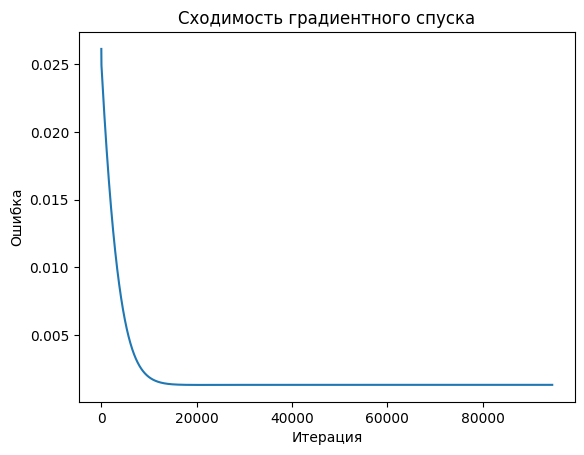

In [633]:
u_data = np.array(u_values_with_noise)

# Начальные параметры
u_0 = u_data[0]
a_init, b_init = 10, 6

# Оптимизация
a_opt, b_opt, history = gradient_descent_solve(u_data, u_0, a_init, b_init, t_span, t_eval, dt)

# Вывод результатов
print(f"Оптимальные параметры: a = {a_opt:.4f}, b = {b_opt:.4f}")

# Визуализация ошибки
plt.plot(history)
plt.xlabel("Итерация")
plt.ylabel("Ошибка")
plt.title("Сходимость градиентного спуска")
plt.show()

In [634]:
np.linspace(0, 2, 10)

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

## Задача 2

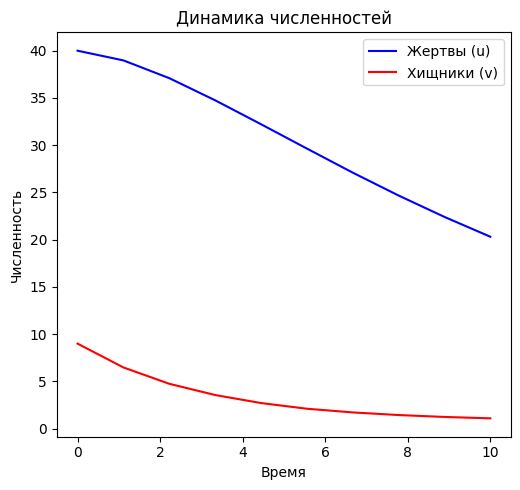

In [732]:
# Параметры системы
alpha, beta, gamma, delta = 0.1, 0.01, 0.1, 0.01
K = 10
dt = 1

def lotka_volterra(t, z):
    u, v = z
    du_dt = -1*alpha * u + beta * u * v
    dv_dt = gamma * v - delta * u * v
    return [du_dt, dv_dt]

# Начальные условия
u0, v0 = 40, 9
t_span = (0, dt*K)  # Интервал времени
t_eval = np.linspace(*t_span, K) 
z0 = [u0, v0]  # Начальные значения

# Решение системы
solution = solve_ivp(lotka_volterra, t_span, z0, t_eval=t_eval)

# Построение графиков
plt.figure(figsize=(10, 5))

# Популяции от времени
plt.subplot(1, 2, 1)
plt.plot(solution.t, solution.y[0], label="Жертвы (u)", color="blue")
plt.plot(solution.t, solution.y[1], label="Хищники (v)", color="red")
plt.xlabel("Время")
plt.ylabel("Численность")
plt.legend()
plt.title("Динамика численностей")

# # Фазовая плоскость
# plt.subplot(1, 2, 2)
# plt.plot(solution.y[0], solution.y[1], color="purple")
# plt.xlabel("Жертвы (u)")
# plt.ylabel("Хищники (v)")
# plt.title("Фазовая траектория")

plt.tight_layout()
plt.show()

u_data = np.array(solution.y[0])
v_data = np.array(solution.y[1])


In [744]:
# def get_const_alpha(u, v, alpha, beta, gamma, delta):
#     A = gamma - delta * u - beta * v + alpha
#     B = beta * u * delta * v
#     C1 = (1 - A / math.sqrt(A*A - 4*B))/(2*beta)
#     C2 = 1/beta - C1
#     return C1, C2


# def zw_alpha(u_data, v_data, alpha, beta, gamma, delta, dt):
#     z_alpha_values =[]
#     w_alpha_values =[]
#     t_k = 0
#     for u_k, v_k in zip(u_data, v_data):
#         # Получаем константы
#         A = gamma - delta * u_k - beta * v_k + alpha
#         B = beta * u_k * delta * v_k
#         tmp_sqrt = math.sqrt(A*A - 4*B)
#         C1 = (1 - A / tmp_sqrt)/(2*beta)
#         C2 = 1/beta - C1

#         # Получаем частные производные
#         tmp_exp1 = math.exp(-0.5 * (tmp_sqrt + A) * t_k)
#         tmp_exp2 = math.exp(0.5 * (tmp_sqrt - A) * t_k)
#         w = C1*tmp_exp1 + C2*tmp_exp2 - 1/beta
#         dw = -0.5 * (tmp_sqrt + A) * C1 *tmp_exp1 + 0.5 * (tmp_sqrt - A) * C2 *tmp_exp2

#         z = (w * (gamma - delta * u_k) - dw)/(delta*v_k)

#         z_alpha_values.append(z)
#         w_alpha_values.append(w)
#         t_k += dt

#     return z_alpha_values, w_alpha_values

def zw_alpha(u_data, v_data, alpha, beta, gamma, delta, dt):
    z_alpha_values =[]
    w_alpha_values =[]
    t_k = 0
    for u_k, v_k in zip(u_data, v_data):
        # Получаем константы
        A = alpha - beta*v_k + delta - gamma
        B = (delta*u_k-gamma)*(alpha-beta*v_k) + delta*v_k*beta*u_k
        C = u_k + (delta*u_k-gamma)*u_k
        # print(A, B, C)

        tmp_sqrt = math.sqrt(abs(A*A - 4*B))
        C2 = (C*(tmp_sqrt+A)/2/B - u_k)/tmp_sqrt
        C1 = C/B - C2

        # Получаем частные производные
        tmp_exp1 = math.exp(-0.5 * (tmp_sqrt + A) * t_k)
        tmp_exp2 = math.exp(0.5 * (tmp_sqrt - A) * t_k)
        z = C1*tmp_exp1 + C2*tmp_exp2 - C/B
        dz = -0.5 * (tmp_sqrt + A) * C1 *tmp_exp1 + 0.5 * (tmp_sqrt - A) * C2 *tmp_exp2

        w = (dz + u + (alpha-beta*v_k)*z)/(beta*u_k)

        z_alpha_values.append(z)
        w_alpha_values.append(w)
        t_k += dt

    return z_alpha_values, w_alpha_values


In [734]:
# def zw_alpha(u_data, v_data, alpha, beta, gamma, delta, t_span, t_eval):
#     z_alpha_values =[]
#     w_alpha_values =[]
#     k = 0
#     for u_k, v_k in zip(u_data, v_data):
#         def zw(t, r):
#             z, w = r
#             dz_dt = (beta*v_k - alpha) - u_k + beta*u_k*w
#             dw_dt = (gamma - delta * u_k) * w - delta * v_k*z
#             return [dz_dt, dw_dt]

#         solution = solve_ivp(zw, t_span, [0, 0], t_eval=t_eval)

#         z_value = solution.y[0][k]
#         w_value = solution.y[1][k]

#         z_alpha_values.append(z_value)
#         w_alpha_values.append(w_value)
#         k += 1
#     return z_alpha_values, w_alpha_values


In [745]:
def gradient_descent_solve(u_data, v_data, z0, alpha_init, beta_init, gamma_init, delta_init, t_span, t_eval, dt, lr=0.1, max_iter=100000):
    """
    Реализация градиентного спуска для оптимизации параметров a и b.
    """
    alpha, beta, gamma, delta = alpha_init, beta_init, gamma_init, delta_init
    history = []

    for iteration in range(max_iter):
        # print(iteration)
        def lotka_volterra(t, z):
            u, v = z
            du_dt = -1*alpha * u + beta * u * v
            dv_dt = gamma * v - delta * u * v
            return [du_dt, dv_dt]

        # Решение системы
        solution = solve_ivp(lotka_volterra, t_span, z0, t_eval=t_eval)
        # print('solution')

        # Вычисление модели и ошибки
        u_model = solution.y[0]
        v_model = solution.y[1]

        error = np.sum((u_model - u_data) ** 2) + np.sum((v_model - v_data) ** 2)
        history.append(error)
        # print(error)

        # print(f"{u_data=}, {v_data=}")
        z_alpha_values, w_alpha_values = zw_alpha(u_data, v_data, alpha, beta, gamma, delta, dt)

        # print(f"{z_alpha_values=}, {w_alpha_values=}")
        
        # Численное вычисление градиентов
        grad_alpha = 2 * np.sum((u_model - u_data) * z_alpha_values) + 2 * np.sum((v_model - v_data) * w_alpha_values)
        
        # Обновление параметров
        alpha -= lr * grad_alpha
        
        # Вывод промежуточного результата
        if iteration % 10 == 0:
            print(f"Итерация {iteration}, ошибка: {error:.4f}, alpha: {alpha:.4f}")
            print(f"{grad_alpha=}")
        
        # Условие остановки
        if len(history) > 1 and abs(history[-2]-history[-1]) < 1e-16 :
            print("Условие остановки")
            print(f"{history=}")
            print(history[-2]-history[-1])
            break
    
    return alpha, history

In [746]:


# Начальные параметры
alpha_init, beta_init, gamma_init, delta_init = 0.2, 0.01, 0.1, 0.01

# Оптимизация
alpha_opt, history = gradient_descent_solve(u_data, v_data, z0, alpha_init, beta_init, gamma_init, delta_init, t_span, t_eval, dt, lr=0.1, max_iter=3000)

# Вывод результатов
print(f"Оптимальные параметры: alpha = {alpha_opt:.4f}")

# Визуализация ошибки
plt.plot(history)
plt.xlabel("Итерация")
plt.ylabel("Ошибка")
plt.title("Сходимость градиентного спуска")
plt.show()

Итерация 0, ошибка: 1064.0571, alpha: 3542.5268
grad_alpha=np.float64(-35423.268351902734)


KeyboardInterrupt: 